In [5]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [7]:
import pandas as pd

df = pd.read_csv('')
df.head(10)
data = pd.read_csv("filename.csv")

UnicodeDecodeError: ignored

In [ ]:
df.groupby('sentiment').describe()

twitts                          
           count unique           top freq
sentiment                                 
0          15000  14939      headache    8
1          15000  14961  good morning   18

In [ ]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

In [ ]:
df_1 = df[df["sentiment"]== 1]
df_1.shape[0]

15000

In [ ]:
df_0 = df[df["sentiment"]== 0]
df_0.shape[0]

15000

In [ ]:
 df_1_downsampled = df_1.sample(df_1.shape[0])
 df_1_downsampled.shape


(15000, 2)

In [ ]:
 df_0_downsampled = df_0.sample(df_0.shape[0])
 df_0_downsampled.shape[0]

15000

In [ ]:
df_balanced = pd.concat([ df_0_downsampled,df_1_downsampled])
df_balanced.shape[0]

30000

In [ ]:
df_balanced['sentiment'].value_counts()

0    15000
1    15000
Name: sentiment, dtype: int64

In [ ]:
df_balanced['sentiment'].value_counts()

0    15000
1    15000
Name: sentiment, dtype: int64

In [ ]:
df_balanced.sample(5)

,twitts,sentiment
18135,is off to his sisters wedding today,1
28428,jonjames3 i am too lazy to get to the computer...,0
14601,donnieslady7 good idea those bad boys r defina...,1
22905,so tired and its raining i should be in bed bu...,0
356,nappyfro youre crazy jerry i have been showin ...,0


In [ ]:
df['1']=df['sentiment'].apply(lambda x: 1 if x=='1' else 0)
df.head(5)

,twitts,sentiment,1
0,robbiebronniman sounds like a great night,1,0
1,damn the person who stolde my wallet may karma...,1,0
2,greetings from the piano bench photo,1,0
3,drewryanscott i love it i love you haha forget...,1,0
4,kissthestars pretty pretty pretty please pakid...,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['twitts'],df_balanced['sentiment'], stratify=df_balanced['sentiment'])

In [ ]:
X_train.head(10)

17364    fam round today y so glad diveristy won last n...
26847    joannaangel whoops your twitter typos are almo...
11082    wondering if it is wrong i am getting a lump i...
3968     going to bed tomorrow is abby day she is leavi...
17206                                  good luck westmount
1401     she come over and bring me chocolate aw i feel...
16405    nostalgic modesaw pics of old classmated on th...
19971    collin is driving through dc traffic all by hi...
26899    justinchon hi justin you come in london in jul...
7199     geri1980 it was a good show i am sure you will...
Name: twitts, dtype: object

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "well jack has one her name is deven ", 
    "who is jack "
    "one of my brother "
    "you like deven yaa but jack doesent share her with me bu deven does"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8051764 , -0.5131939 , -0.7063926 , ..., -0.6599234 ,
        -0.70094544,  0.8677509 ],
       [-0.62274337, -0.3044835 , -0.8787646 , ..., -0.8052324 ,
        -0.5805717 ,  0.7585042 ]], dtype=float32)>

In [ ]:
e= get_sentence_embeding([
      "grape",
      "banana"
      "apple",
      "elonmusk",
      "bill gates",
      "mukesh ambani"
])

In [ ]:
e

<tf.Tensor: shape=(5, 768), dtype=float32, numpy=
array([[-0.85408497, -0.17408392,  0.23000868, ...,  0.22893798,
        -0.5581088 ,  0.8516548 ],
       [-0.89801806, -0.16684309, -0.59812945, ..., -0.4657271 ,
        -0.6645383 ,  0.90702885],
       [-0.85493565, -0.29240093, -0.02458517, ...,  0.08042904,
        -0.5426464 ,  0.80689186],
       [-0.78544384, -0.299497  ,  0.41027427, ...,  0.5222542 ,
        -0.4957355 ,  0.81507534],
       [-0.76950395, -0.44656187, -0.60636735, ..., -0.22744505,
        -0.55201423,  0.68797207]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity([e[1]],[e[4]])

array([[0.95752734]], dtype=float32)

In [ ]:
#bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='kunal')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 kunal (InputLayer)             [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['kunal[0][0]']                  
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
len(X_train)

22500

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=1)



102/704 [===>..........................] - ETA: 2:19:51 - loss: 0.6970 - accuracy: 0.5291 - precision: 0.5355 - recall: 0.5629

In [ ]:
model.evaluate(X_test, y_test)

235/235 [==============================] - 3386s 14s/step - loss: 0.6263 - accuracy: 0.6428 - precision: 0.5942 - recall: 0.9011


[0.626299262046814, 0.642799973487854, 0.594162106513977, 0.9010666608810425]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()


235/235 [==============================] - 3115s 13s/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

NameError: ignored

Text(33.0, 0.5, 'Truth')

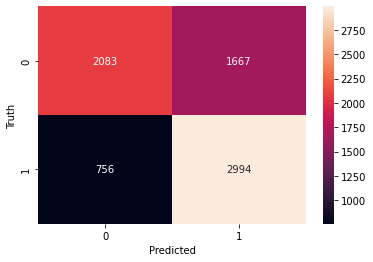

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63      3750
           1       0.64      0.80      0.71      3750

    accuracy                           0.68      7500
   macro avg       0.69      0.68      0.67      7500
weighted avg       0.69      0.68      0.67      7500



NameError: ignored